In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    auc,
    precision_recall_curve,
)

In [2]:
# import data
X_train = pd.read_csv("../Transformed_Data/X_train.csv")
X_test = pd.read_csv("../Transformed_Data/X_test.csv")
y_train = pd.read_csv("../Transformed_Data/y_train.csv")
y_test = pd.read_csv("../Transformed_Data/y_test.csv")

In [3]:
categorical_columns = [
    "country_United_States",
    "country_Saudi_Arabia",
    "country_India",
    "country_Britain",
    "country_Italy",
]

# Separate continuous and categorical columns
X_categorical = X_train[categorical_columns]
X_continuous = X_train.drop(columns=categorical_columns)

# Apply scaling only to continuous columns
scaler = StandardScaler()
X_continuous_scaled = pd.DataFrame(scaler.fit_transform(X_continuous))

# Concatenate the scaled continuous columns with the unchanged categorical columns
X_train_scaled = pd.concat(
    [X_continuous_scaled, X_categorical.reset_index(drop=True)], axis=1
)

# Apply the same transformation to the test set
X_categorical_test = X_test[categorical_columns]
X_continuous_test = X_test.drop(columns=categorical_columns)

X_continuous_test_scaled = pd.DataFrame(scaler.transform(X_continuous_test))
X_test_scaled = pd.concat(
    [X_continuous_test_scaled, X_categorical_test.reset_index(drop=True)], axis=1
)

# Ensure that all column names are strings
X_train_scaled.columns = X_train_scaled.columns.astype(str)
X_test_scaled.columns = X_test_scaled.columns.astype(str)

### Use the following code block to generate all your model performance metrics

In [12]:
# Define and train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict
y_pred = mlp.predict(X_test_scaled)
y_pred_prob = mlp.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_reversed = np.flip(conf_matrix, axis=(0, 1))
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall_vals, precision_vals)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(
    {
        "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "PR AUC"],
        "Value": [accuracy, precision, recall, f1, roc_auc, pr_auc],
    }
)

metrics_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Metric,Value
0,Accuracy,0.986431
1,Precision,0.363636
2,Recall,0.133333
3,F1 Score,0.195122
4,ROC AUC,0.800833
5,PR AUC,0.191503


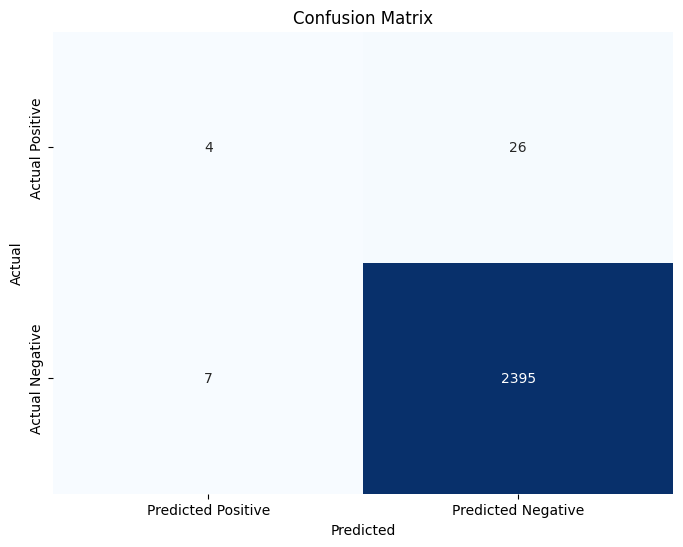

In [13]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_reversed,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted Positive", "Predicted Negative"],
    yticklabels=["Actual Positive", "Actual Negative"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

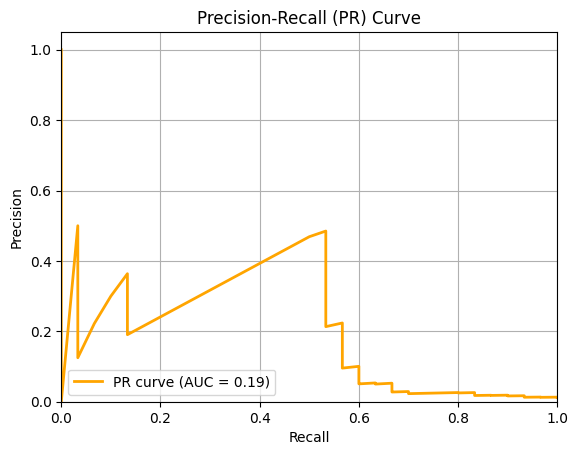

In [15]:
# Plot Precision-Recall (PR) curve
plt.figure()
plt.plot(
    recall_vals,
    precision_vals,
    color="orange",
    lw=2,
    label=f"PR curve (AUC = {pr_auc:.2f})",
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall (PR) Curve")
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()